##Optimisation de la distriburtion de la connexion internet dans une colocation :

### Membres du projet :
  1. El Barhichi Mohammed
  2. Nokra Hiba
  3. Rahouti Ayman
  4. Mazoz Safia
  5. Ben Attou El Idrissi Hibat Allah

### 1. Introduction


Dans le cadre du mini-projet d'optimisation, nous souhaitons appliquer les connaissances que nous avons acquises lors de notre cours à une situation réelle. Pour cela, nous avons décidé de modéliser un problème d'optimisation original qui est à la fois simple à implémenter et très enrichissant pour nous familiariser avec ce type de problèmes. Dans la suite, nous vous présenterons la modélisation de notre sujet ainsi que les différentes pistes de réflexion que nous avons choisies d'adopter.

### 2. Modélisaton

Trois colocataires, A, B et C, résidant chacun dans une chambre séparée, souhaitent partager une connexion Internet à partir d'un routeur en utilisant un câble ADSL. Pour cela, le routeur sera fixé au plafond et trois câbles relieront les ordinateurs portables des colocataires à la connexion Internet. L'objectif principal de ce projet est de minimiser la longueur totale des câbles nécessaires pour relier les ordinateurs portables des colocataires au routeur.

Cependant, diverses contraintes doivent être prises en compte pour résoudre ce problème d'optimisation. D'une part, pour des raisons de santé, il est nécessaire que le routeur soit situé à l'extérieur des trois chambres (à l'extérieur des <font color="green"> zones vertes </font>).
D'autre part, pour des raisons de sécurité et de facilité de réparation, le routeur doit être positionné à l'intérieur de la maison (à l'intérieur du <font color="red"> carré rouge </font>). De plus, afin de garantir une connexion Internet stable, le routeur doit être suffisamment proche de l'installation et de la source d'énergie, ce qui le limite à une zone spécifique représentée en <font color="purple"> violet </font> sur le schéma.



> Les positions des différents zones sont choisis arbitrairement. Pourtant, on
peut toujours adapter ce même problème au différents scénarios décrivant des situations réalistes




Ainsi, le problème consiste à trouver l'emplacement optimal X* où placer le routeur, tout en respectant les contraintes mentionnées précédemment. En optimisant l'emplacement du routeur, il est possible de réduire les longueurs des câbles nécessaires pour relier les ordinateurs portables des colocataires à la connexion Internet.

La Figure suivante modélise le problème, où les colocataires A, B et C sont représentés par les lettres correspondantes dans leurs chambres respectives, et le routeur est représenté par le point X* (la position initiale du routeur dans la figure est aléatoire). Les câbles reliant les ordinateurs portables aux routeurs sont représentés par des lignes.

Text(2.5, 2, 'X*')

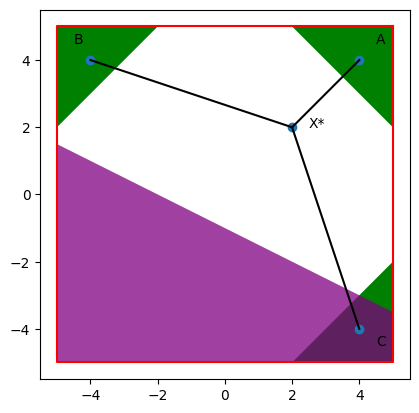

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = [5, 5, - 5, - 5, 5]
y = [5, -5, -5, 5, 5]
ax.plot( x, y ,c='r' )
ax.set_aspect('equal')
Coords=[([5, 2, 5],[2, 5, 5]),([5,2,5],[- 2, - 5, - 5]),([- 5, - 2, - 5],[2,5,5])]
for x,y in Coords:
  plt.fill(x, y,'g')
x = [- 5, 5, 5, - 5]
y = [1.5, - 3.5, - 5, - 5]
plt.fill(x, y, 'purple', alpha=0.75)
plt.annotate('A', xy=(4, 4), xytext =(4.5, 4.5))
plt.annotate('B', xy=(-4, 4), xytext=(-4.5,4.5))
plt.annotate('C', xy=(4,-4), xytext=(4.5,-4.5))
x=[ 4 , -4,4, 2]
y=[4, 4,-4, 2]
plt.scatter (x, y)
for i in range (3) :
    xx=[x[i], 2]
    yy=[y[i], 2]
    plt.plot(xx,yy,'k')
plt.annotate('X*', xy= (2, 2), xytext= (2.5, 2))

### 3. formulation mathématique du problème

#### 3.1. Définition de la fonction coût
Notre but est de minimiser la longueur totale des câbles nécessaires. C'est donc de minimiser la somme des distances entre la position du routeur et les trois chambres.

La fonction coût à minimiser s'écrit alors:

\begin{align}
f(x, y) = d(A, X) + d(B, X) + d(C, X)
\\
\\
\end{align}

avec : $d(A, X^*)$ est la distance entre les le point $A$ et la position $X^*$ du routeur qui s'exprime en deux dimensions par :

\begin{align}
d(A, X) = \sqrt{(x^A -x^*)^2 +(y^A -y^*)^2}
\\
\\
\end{align}


#### 3.2. Formulation des contraintes

* La contrainte que le routeur soit  l'intérieur de la maison:

\begin{align}
        \left\{
        \begin{array}{cl}
        −5 ≤ x ≤ 5 \\
        −5 ≤ y ≤ 5
        \end{array}
        \right.
\end{align}

* La contrainte que le routeur soit à l'extérieur des chambres :

\begin{align}
        \left\{
        \begin{array}{cl}
        y − x − 7 ≤ 0 \\
        −y + x + 7 ≤ 0 \\
        y + x − 7 ≤ 0 \\
        \end{array}
        \right.
\end{align}

* La contrainte que le routeur soit proche de l'installation et de la source d'énergie:

\begin{align}
        \left\{
        \begin{array}{cl}
        y + \frac{x}{2} + 1 ≤ 0
        \end{array}
        \right.
\end{align}


l'ensemble des contraintes est donc :


\begin{align}
K = \{ (x,y) \in [-5,5]^2  \ \backslash \ y − x − 7 ≤ 0 , \  −y + x + 7 ≤ 0 , \ y + x − 7 ≤ 0 , \ y + \frac{x}{2} + 1 \ 0 \}
\\
\end{align}


et la fonction coût est donc définie sur $[-5,5]^2$ dans $\mathbb{R}$ par :

\begin{align}
f(x, y) = \sqrt{(x^A -x)^2 +(y^A -y)^2} + \sqrt{(x^B -x)^2 +(y^B -y)^2} + \sqrt{(x^C -x)^2 +(y^C -y)^2}
\\
\\
\end{align}

on prend arbitrairement $A=(4,4)$ , $B=(-4,4)$ et $C=
(4,-4)$


#### 3.3. Position du problème
Au final, le problème d'optimisation est :

\begin{align}
\min_{ (x,y) \in K} f(x,y)
\end{align}

### 4. Analyse mathématique du problème

#### 4.1. Existence et unicité de la solution

* Existance :

-La fonction distance euclidienne est continue, donc $f$ est continue sur $[-5,5]^2$ comme somme de fonctions continues.

-Le domaine $[-5, 5]^2$ est un carré fermé et borné, donc c'est un compact.

d'où l'existance de la solution du problème d'optimisation

* Unicité :

-La fonction $f$ est strictement convexe sur $[-5,5]^2 $comme somme de trois fonctions strictement convexes (distances euclidiennes)

d'où l'unicité de la solution

* Visualisation de la fonction coût :

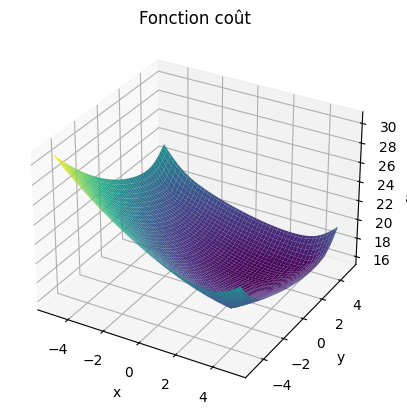

In [3]:
import numpy as np
def f(x, y):
    return np.sqrt((4-x)**2 + (4-y)**2) + np.sqrt((-4-x)**2 + (4-y)**2) + np.sqrt((4-x)**2 + (-4-y)**2)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Fonction coût')
plt.show()


#### 4.2. Caractérisation du minimum

La résolution numérique de ce problème d'optimisation peut être effectuée par différents algorithmes. Dans notre cas, le problème d'optimisation est un problème convexe avec des contraintes. Nous allons donc choisir l'algorithme du gradient projeté pour résoudre ce problème.

* Convergence de l'algorithme

-La fonction coût f est convexe, ce qui garantit que tout minimum local est également un minimum global. Dans le contexte de l'algorithme du gradient projeté, cela signifie que lorsque nous nous déplaçons dans la direction opposée du gradient de la fonction coût, nous nous rapprochons du minimum global.

-L'ensemble des contraintes K est convexe et fermé, et la solution optimale se trouve dans cet ensemble. L'algorithme du gradient projeté garantit la convergence vers une solution qui satisfait toutes les contraintes. En projetant les mises à jour des variables de décision sur l'ensemble K à chaque itération, nous nous assurons de rester dans l'ensemble faisable et de satisfaire les contraintes.

Cela garantit la convergence de l'algorithme.

* Vitesse de convergence

-La convexité de la fonction f est bénéfique pour la vitesse de convergence, car elle garantit l'absence de minima locaux et facilite la recherche d'un minimum global.
-Les contraintes sont linéaires et convexes, ce qui simplifie la recherche des points satisfaisant ces contraintes. La projection sur l'ensemble des contraintes est une opération relativement simple et peut être effectuée efficacement.

La vitesse de convergence de l'algorithme du gradient projeté dépend également du choix des paramètres tels que le pas d'apprentissage (step size) et les seuils de convergence. Des valeurs bien choisies pour ces paramètres peuvent accélérer la convergence de l'algorithme.

### 5. Implémentation et simulations numériques

#### 5.1. Programmation de l'algorithme avec des tests de validation

Nous allons maintenant programmer l'algorithme du gradient projeté afin de résoudre le problème d'optimisation.

Le choix du taux d'apprentissage alpha dépend essentiellement de l'alpha-convexité de notre fonction coût.

Plus nous diminuons ce taux, plus nous obtenons des résultats précis, mais cela ralentit également la résolution du problème.

Dans notre cas, le choix a été fait après avoir essayé plusieurs autres pas qui donnaient des résultats différents en termes de convergence, d'efficacité et de précision. Nous avons finalement choisi un taux qui répond à la fois aux conditions de l'alpha-convexité et aux exigences de précision et de vitesse.

In [4]:
from numpy.linalg import norm
from cvxopt import matrix

def cost_function(x, y, A, B, C):
    return np.sqrt((A[0]-x)**2 + (A[1]-y)**2) + np.sqrt((B[0]-x)**2 + (B[1]-y)**2) + np.sqrt((C[0]-x)**2 + (C[1]-y)**2)

def gradient(x, y, A, B, C):
    grad_x = (x - A[0]) / np.sqrt((A[0] - x)**2 + (A[1] - y)**2) + (x - B[0]) / np.sqrt((B[0] - x)**2 + (B[1] - y)**2) + (x - C[0]) / np.sqrt((C[0] - x)**2 + (C[1] - y)**2)
    grad_y = (y - A[1]) / np.sqrt((A[0] - x)**2 + (A[1] - y)**2) + (y - B[1]) / np.sqrt((B[0] - x)**2 + (B[1] - y)**2) + (y - C[1]) / np.sqrt((C[0] - x)**2 + (C[1] - y)**2)
    return grad_x, grad_y


def projection(x, y):
    x = np.maximum(-5, np.minimum(x, 5))
    y = np.maximum(-5, np.minimum(y, 5))
    if y - x > 7:
        y = x + 7
    elif -y + x > 7:
        y = -x + 7
    elif y + x > 7:
        y = -x + 7
    elif y + x/2 > -1:
        y = -x/2 -1
    return x, y

def gradient_projected_optimization(A,B,C ,alpha=0.0001 ,tol =1e-6 ,Niter =1000000) :
    x = np.random.uniform(-5, 5)
    y = np.random.uniform(-5, 5)
    xn=matrix([[x,y]])

    iter = 0
    err=1
    while err > tol and iter < Niter:
         xn_old=xn
         grad_x, grad_y = gradient(xn[0],xn[1],A,B,C)
         x -= alpha * grad_x
         y -= alpha * grad_y  # prédiction/decente de gradient
         x, y = projection(x, y)
         xn=matrix([[x,y]])

         err=norm(xn_old-xn)
         iter+=1

    if iter <Niter:
        print("l'algorithme n a pas convergé après ", iter, 'itérations')


    else:
       print("l'algorithme n a pas convergé après ", Niter, 'itérations')

    return xn, iter

A = (4, 4)
B = (-4, 4)
C = (4, -4)

xn, iter = gradient_projected_optimization(A, B, C)

print("La position optimale du routeur est : " , xn[0], xn[1])
print("La longueur totale des câbles nécessaires : ", cost_function(xn[0],xn[1], A, B, C))
print("le nombre d'itérations est :", iter)

l'algorithme n a pas convergé après  129880 itérations
La position optimale du routeur est :  2.917930490854332 -2.4589652454271658
La longueur totale des câbles nécessaires :  17.89643002265826
le nombre d'itérations est : 129880


Donc après avoir changer les valeurs du taux alpha et de nombre d'itérations totales Niter, nous pouvons à chaque exécution obtenir des résultats qui s'avèrent prochent. Le point de départ du programme etant alétoire dans $[-5,5]^2$, celà donne toujours des chemins différents pour chaques valeurs

* Visualisation de la position optimal du routeur


Text(2.5, 2, 'X*')

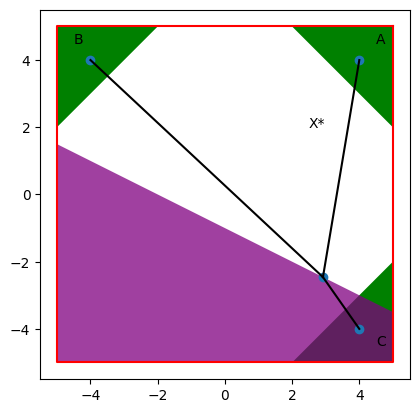

In [5]:
fig, ax = plt.subplots()
x = [5, 5, - 5, - 5, 5]
y = [5, -5, -5, 5, 5]
ax.plot( x, y ,c='r' )
ax.set_aspect('equal')
Coords=[([5, 2, 5],[2, 5, 5]),([5,2,5],[- 2, - 5, - 5]),([- 5, - 2, - 5],[2,5,5])]
for x,y in Coords:
  plt.fill(x, y,'g')
x = [- 5, 5, 5, - 5]
y = [1.5, - 3.5, - 5, - 5]
plt.fill(x, y, 'purple', alpha=0.75)
plt.annotate('A', xy=(4, 4), xytext =(4.5, 4.5))
plt.annotate('B', xy=(-4, 4), xytext=(-4.5,4.5))
plt.annotate('C', xy=(4,-4), xytext=(4.5,-4.5))
x=[ 4 , -4,4, xn[0]]
y=[4, 4,-4, xn[1]]
plt.scatter (x, y)
for i in range (3) :
    xx=[x[i], xn[0]]
    yy=[y[i], xn[1]]
    plt.plot(xx,yy,'k')
plt.annotate('X*', xy= (2, 2), xytext= (2.5, 2))

#### 5.2. Programmation fonctionnelle

Maintenant, nous allons résoudre ce problème en utilisant des fonctions prédéfinies dans la bibliothèque scipy

In [6]:
from scipy.optimize import minimize

def objective_function(x):
    return cost_function(x[0],x[1],A,B,C)

def constraint_1(x):
    return x[0]-x[1]+7

def constraint_2(x):
    return -x[0] - x[1] + 7

def constraint_3(x) :
    return x[1] - x[0] + 7

def constraint_4(x):
    return -x[1] - x[0]/2 - 1

#x and y bounds
x_bounds=(-5,5)
y_bounds=(-5,5)
bounds=(x_bounds, y_bounds)
#constraints listed
c1={'type':'ineq','fun': constraint_1}
c2={'type':'ineq','fun': constraint_2}
c3={'type':'ineq','fun': constraint_3}
c4={'type':'ineq','fun': constraint_4}
constraints=[c1, c2, c3, c4]


output=minimize (objective_function, [-5,-5], method='SLSQP', bounds=bounds, constraints=constraints)

print("La position optimale du routeur est : " , output.x[0], output.x[1])
print("La longueur totale des câbles nécessaires : ", cost_function(output.x[0], output.x[1], A, B, C))

La position optimale du routeur est :  1.3563398404046834 -1.678169920202339
La longueur totale des câbles nécessaires :  17.587823183426423


* Visualisation de la position optimal du routeur

Text(2.5, 2, 'X*')

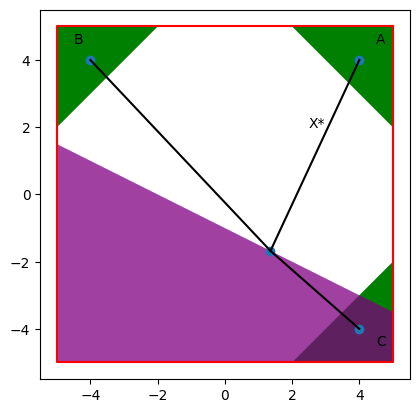

In [7]:
fig, ax = plt.subplots()
x = [5, 5, - 5, - 5, 5]
y = [5, -5, -5, 5, 5]
ax.plot( x, y ,c='r' )
ax.set_aspect('equal')
Coords=[([5, 2, 5],[2, 5, 5]),([5,2,5],[- 2, - 5, - 5]),([- 5, - 2, - 5],[2,5,5])]
for x,y in Coords:
  plt.fill(x, y,'g')
x = [- 5, 5, 5, - 5]
y = [1.5, - 3.5, - 5, - 5]
plt.fill(x, y, 'purple', alpha=0.75)
plt.annotate('A', xy=(4, 4), xytext =(4.5, 4.5))
plt.annotate('B', xy=(-4, 4), xytext=(-4.5,4.5))
plt.annotate('C', xy=(4,-4), xytext=(4.5,-4.5))
x=[ 4 , -4,4, output.x[0]]
y=[4, 4,-4, output.x[1]]
plt.scatter (x, y)
for i in range (3) :
    xx=[x[i], output.x[0]]
    yy=[y[i], output.x[1]]
    plt.plot(xx,yy,'k')
plt.annotate('X*', xy= (2, 2), xytext= (2.5, 2))

#### 5.3. Comparaison et interprétation des résultats

Voici une proposition d'amélioration et de réorganisation du paragraphe pour rendre la comparaison, la conclusion et l'interprétation des résultats plus pertinentes :

"En comparant les résultats obtenus par les deux approches utilisées, nous pouvons observer des différences au niveau de la précision des solutions. La méthode de programmation fonctionnelle, en utilisant la bibliothèque `scipy`, fournit des résultats plus précis avec un point optimal plus proche de la solution recherchée. Par exemple, en comparant les coordonnées du point optimal, le premier algorithme a trouvé $(2.917930490854332, -2.4589652454271658)$, tandis que la méthode utilisant `scipy` a donné $(1.3563398404046834, -1.678169920202339)$. Cela montre que la méthode de programmation fonctionnelle est plus efficace pour atteindre une solution plus précise.

Cependant, il est important de noter que pour le problème spécifique traité, la différence de précision entre les deux approches n'a pas une grande importance pratique. En effet, la différence entre les valeurs du coût total obtenues par les deux algorithmes ($17.89643002265826$ pour le premier algorithme et $17.587823183426423$ pour `scipy`) est relativement faible. Dans ce contexte, les deux approches conduisent à une installation de routeur adéquate.

Lorsqu'une grande précision est requise pour résoudre d'autres problèmes, il est possible d'ajuster les paramètres des fonctions définies dans le premier algorithme et d'expérimenter différentes valeurs afin d'améliorer la précision des résultats. La méthode de programmation fonctionnelle offre cette flexibilité pour régler les paramètres et permettre une convergence plus précise.

En termes de rapidité et de vitesse de convergence, la programmation fonctionnelle présente un avantage par rapport au premier algorithme. La bibliothèque `scipy` utilise des méthodes d'optimisation avancées qui permettent une convergence plus rapide. En ajustant les hyperparamètres appropriés, tels que le taux d'apprentissage et le nombre d'itérations, il est possible d'accélérer la résolution du problème.

En conclusion, la méthode de programmation fonctionnelle utilisant `scipy` offre une solution plus précise pour le problème donné. Cependant, pour des problèmes similaires où la différence de précision n'est pas critique, le premier algorithme peut être suffisant. Il est important de considérer la nature du problème et les exigences spécifiques en termes de précision lors du choix de l'approche d'optimisation appropriée."